## **DSCI 633: Foundations of Data Science**

Rochester Institute of Technology
Fall 2023

**Dataset:** California Housing Dataset

**About the data:** The California Housing Dataset comprises socio-economic and geographical data for housing districts. Variables include median income, housing age, room and bedroom averages, population, and location, providing a diverse dataset.

### **Problem Statement:**  Predictive Analysis and Modeling of California

---

Housing Prices.

**Data Exploration and Visualization**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

In [ ]:
# Exploratory Data Analysis (EDA)
print("Exploratory Data Analysis:")
print(data.describe())

Exploratory Data Analysis:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min  

In [ ]:
# Handle missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


**Feature Engineering and Visualization**


Histograms for Feature Distribution:


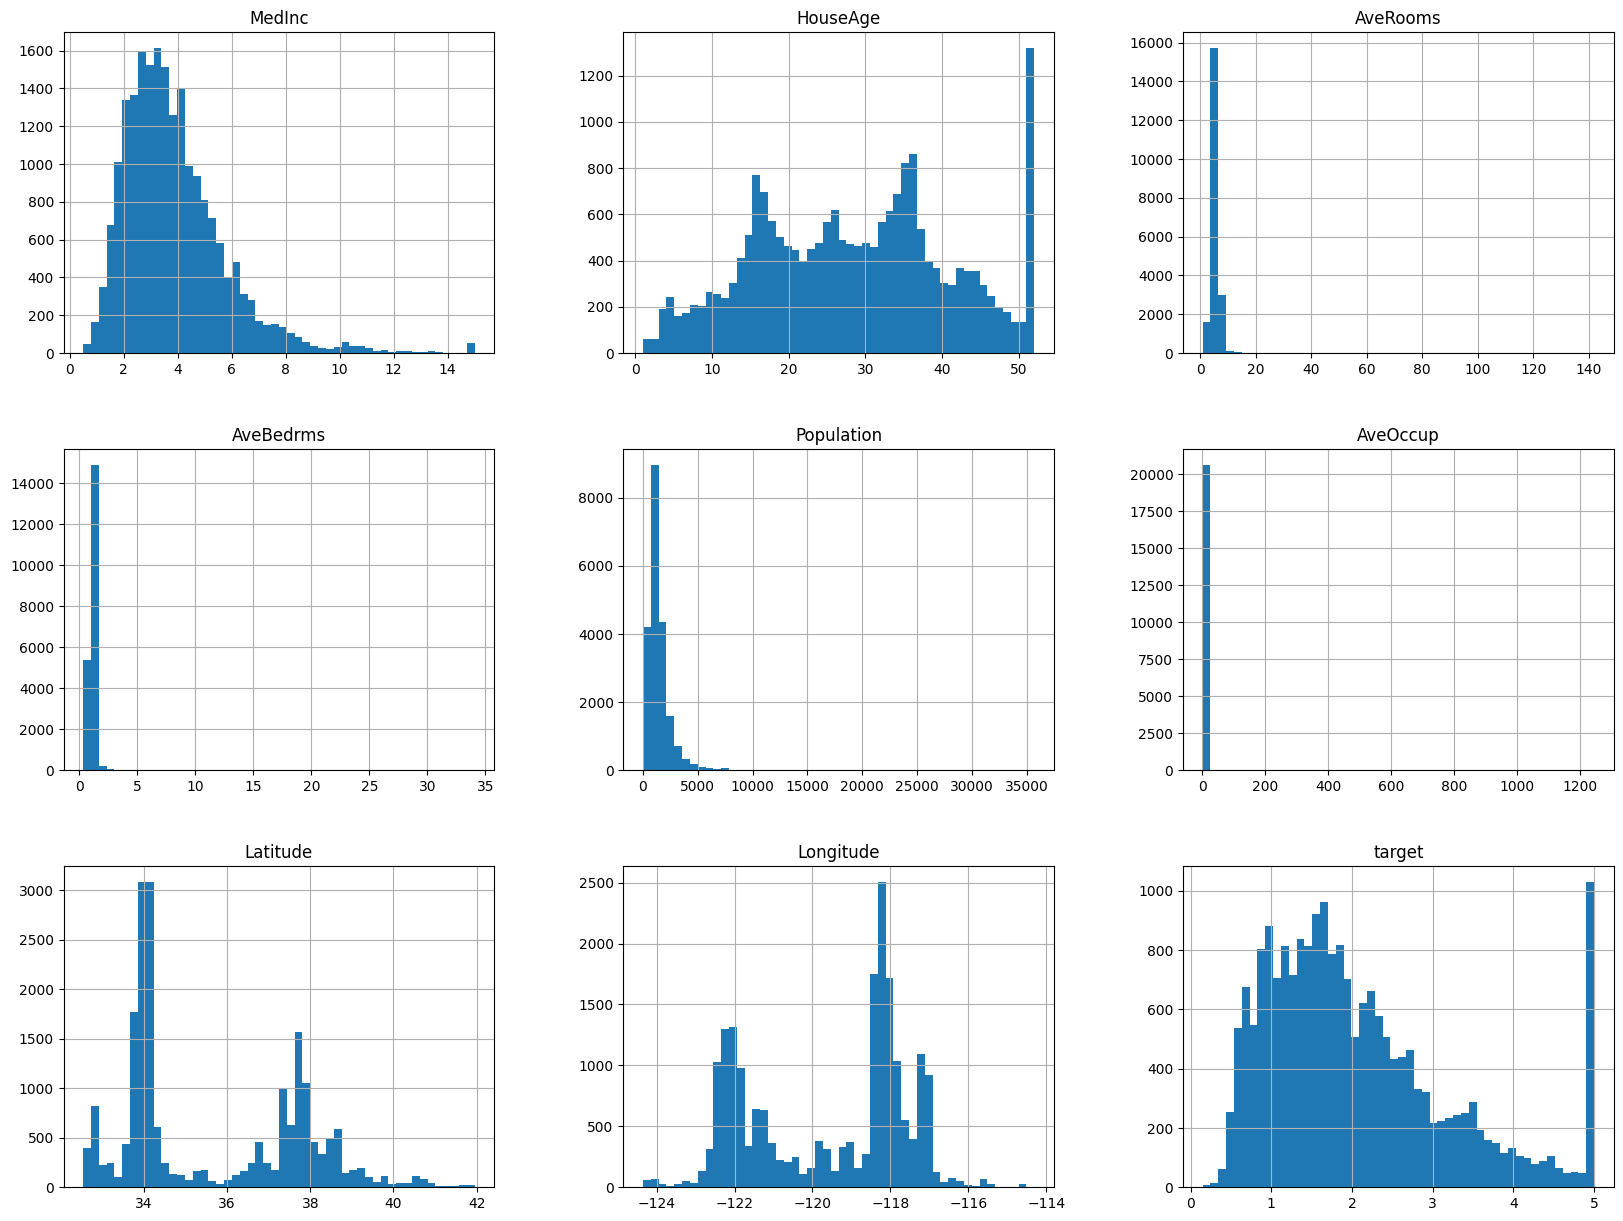

In [ ]:
# Visualization for Anomaly Detection
print("\nHistograms for Feature Distribution:")
data.hist(bins=50, figsize=(20, 15))
plt.show()


Box Plots for Outlier Detection:


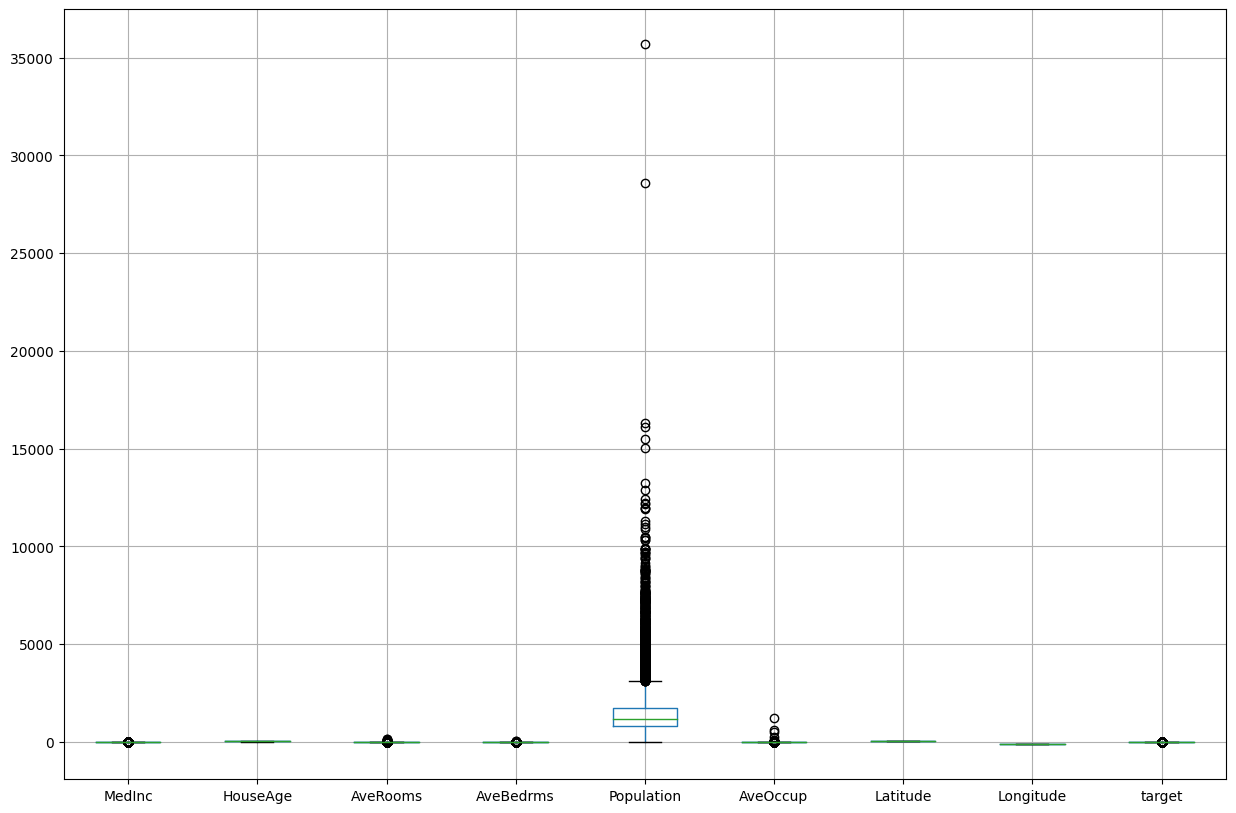

In [ ]:
print("\nBox Plots for Outlier Detection:")
plt.figure(figsize=(15, 10))
data.boxplot()
plt.show()

In [ ]:
# Applying Log Transformation to skewed features
skewed_features = ['AveRooms', 'AveBedrms']  # Replace with actual skewed features
for feature in skewed_features:
    data[feature + '_log'] = np.log1p(data[feature])


Visualization of Log Transformation:


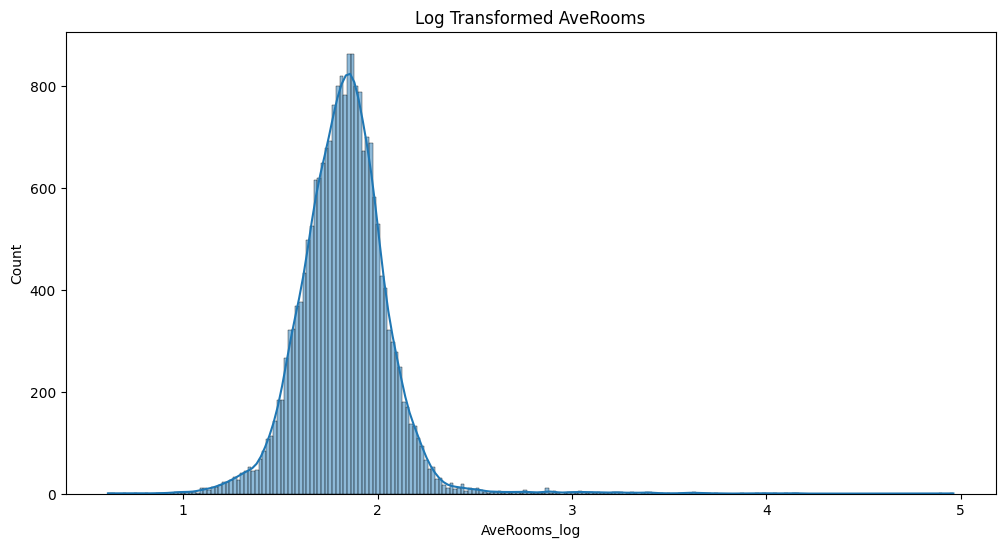

In [ ]:
# Visualize the effect of Log Transformation
print("\nVisualization of Log Transformation:")
plt.figure(figsize=(12, 6))
sns.histplot(data['AveRooms_log'], kde=True)
plt.title('Log Transformed AveRooms')
plt.show()


Correlation Matrix:


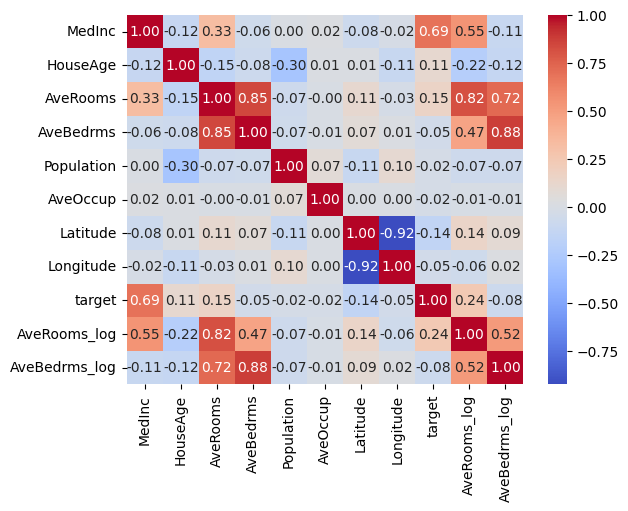

In [ ]:
# Correlation Matrix
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


California Housing Prices Map:


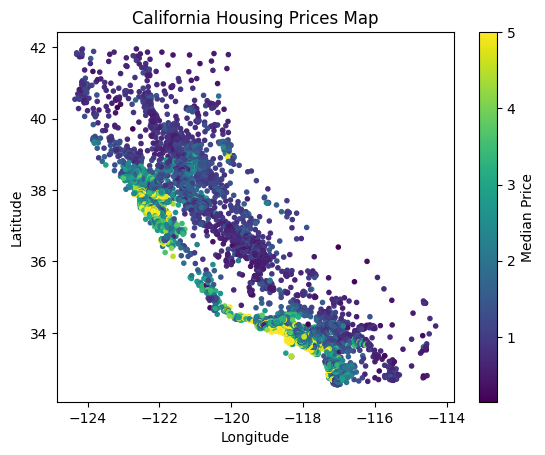

In [ ]:
# California Map Visualization
print("\nCalifornia Housing Prices Map:")
plt.scatter(data['Longitude'], data['Latitude'], c=data['target'], cmap='viridis', marker='.')
plt.colorbar(label='Median Price')
plt.title('California Housing Prices Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Pairplot of Features:


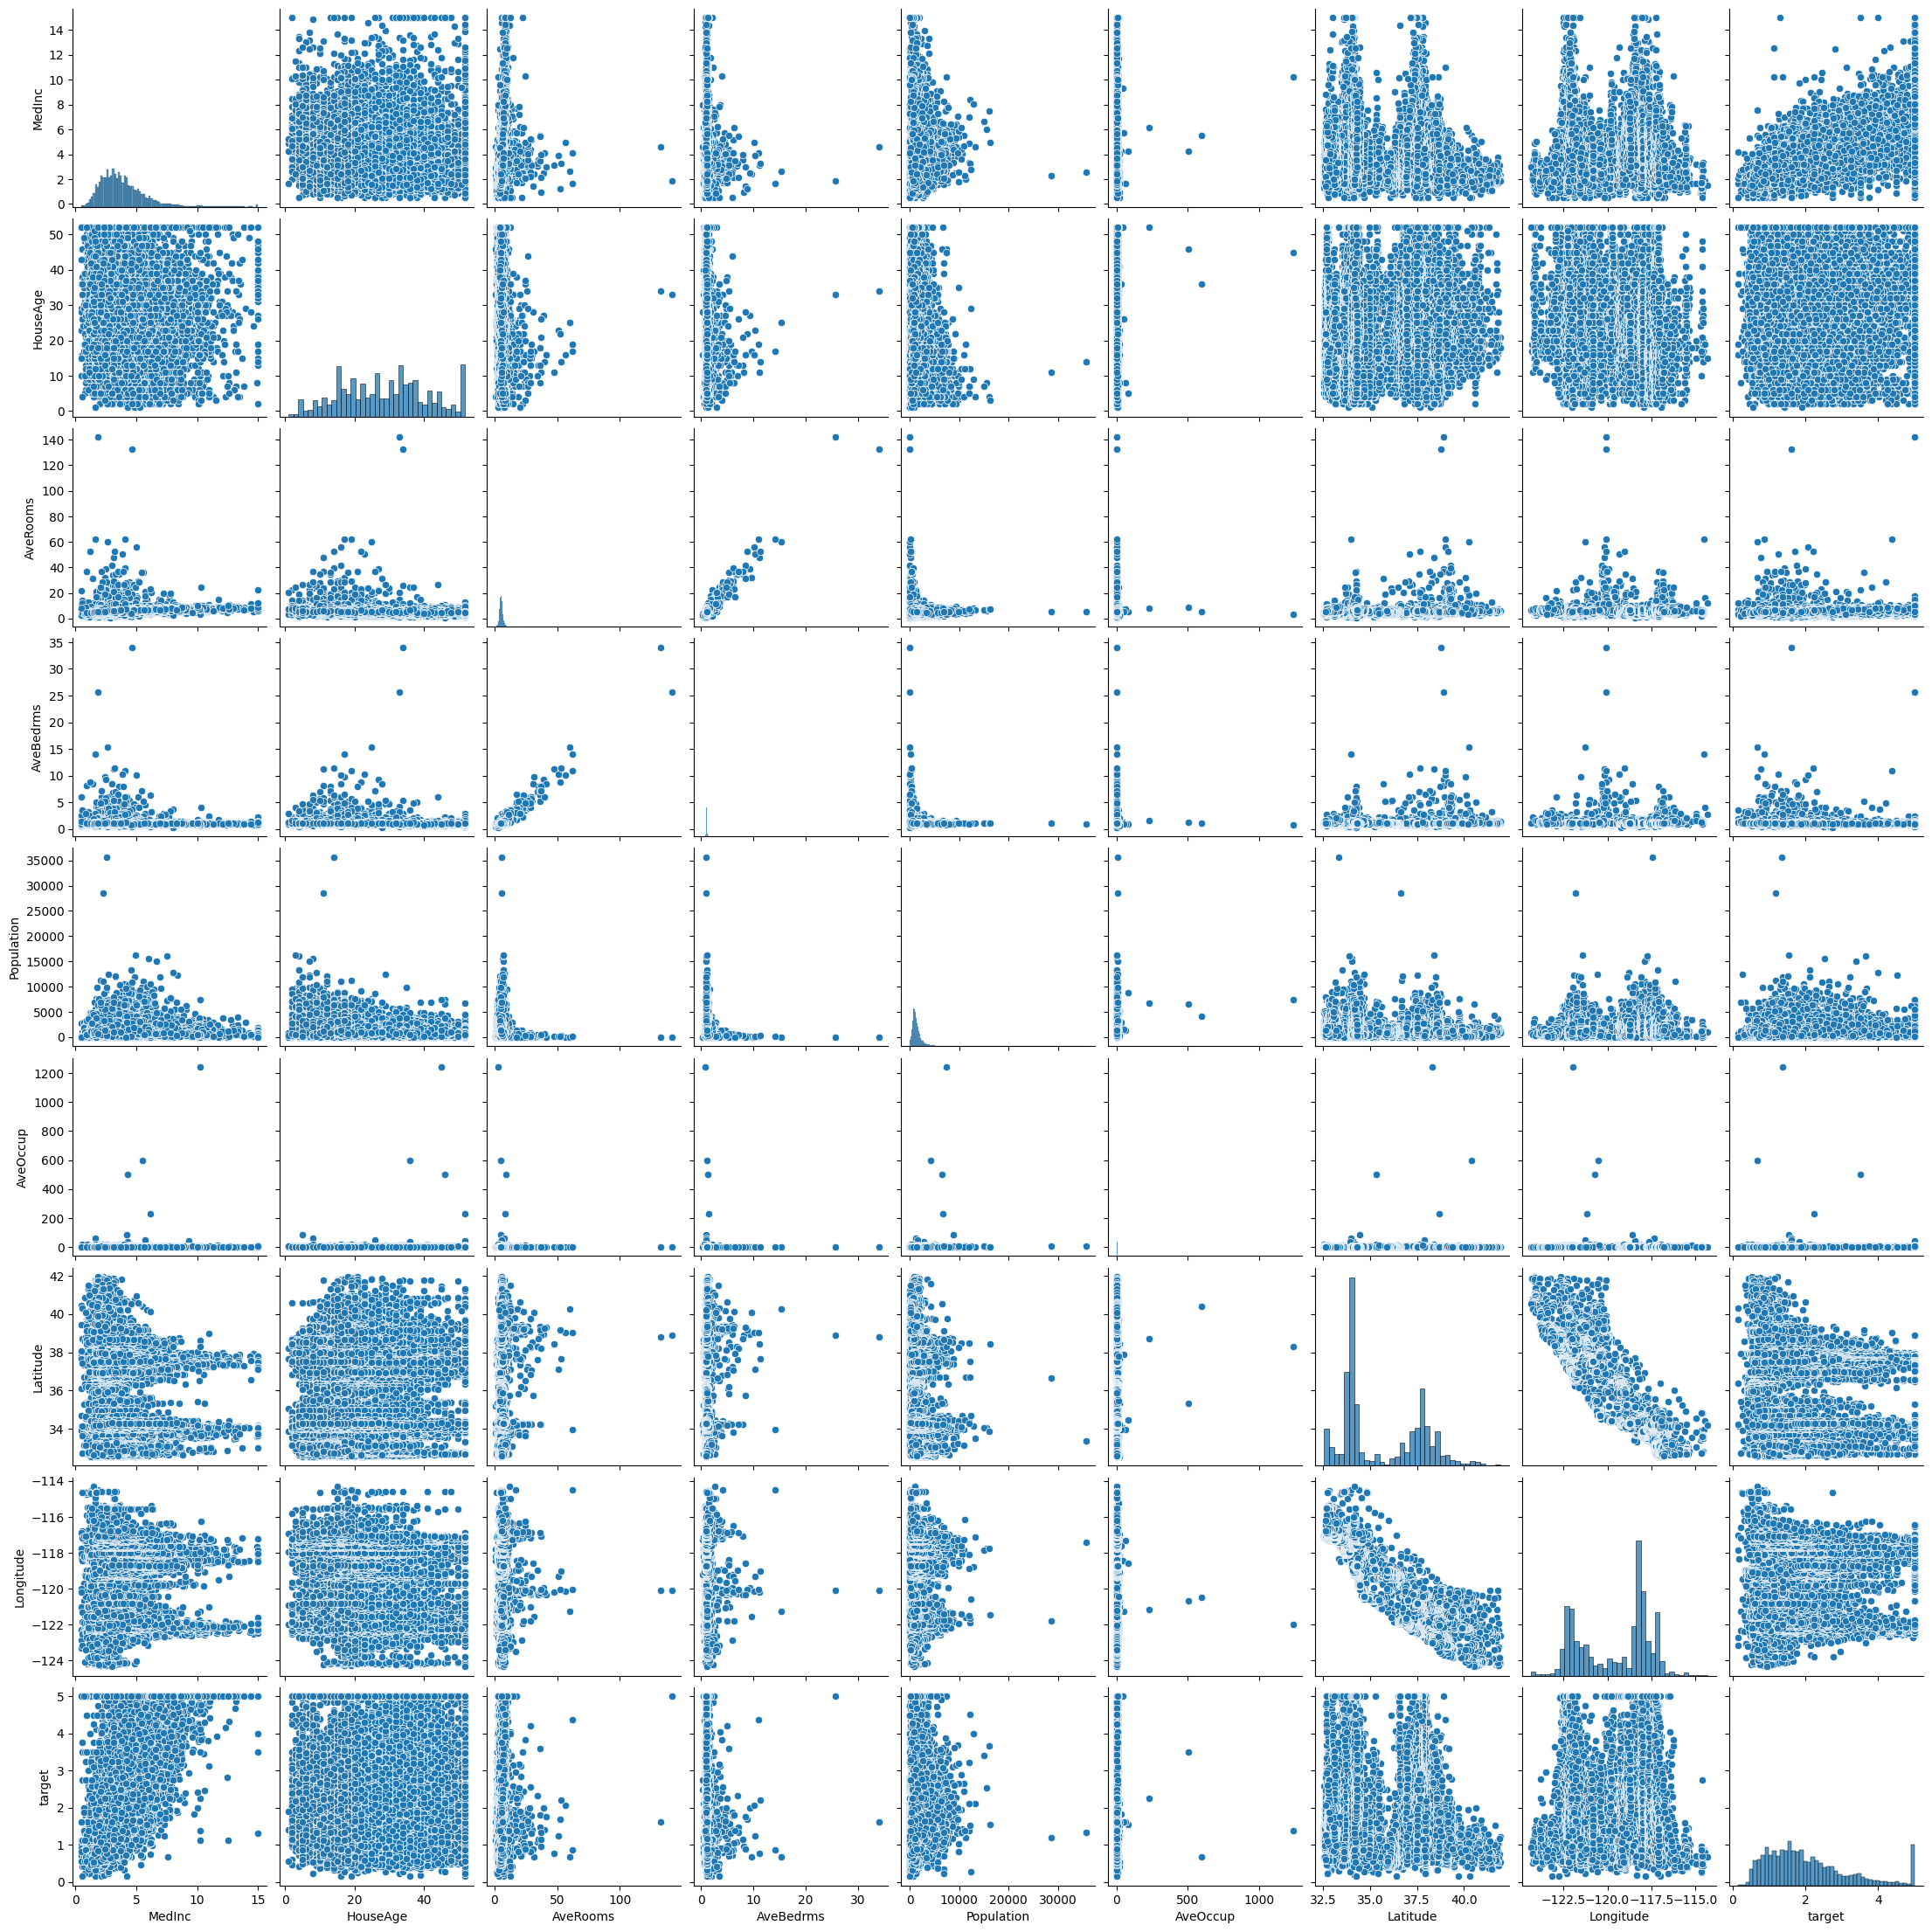

In [ ]:
# Visualization of Feature Relationships
print("\nPairplot of Features:")
sns.pairplot(data, vars=data.columns[:-2])  # Exclude 'target' and 'log_target'
plt.show()

**Model Building and Regularization**

In [ ]:
# Split the data into training and testing sets
X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Selection and Training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5]
}

In [ ]:
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
# PCA Implementation
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Retrain models with PCA-transformed features
linear_model_pca = LinearRegression()
linear_model_pca.fit(X_pca, y_train)

ridge_model_pca = Ridge()
ridge_model_pca.fit(X_pca, y_train)

lasso_model_pca = Lasso()
lasso_model_pca.fit(X_pca, y_train)

rf_model_pca = RandomForestRegressor()
rf_model_pca.fit(X_pca, y_train)

RandomForestRegressor()

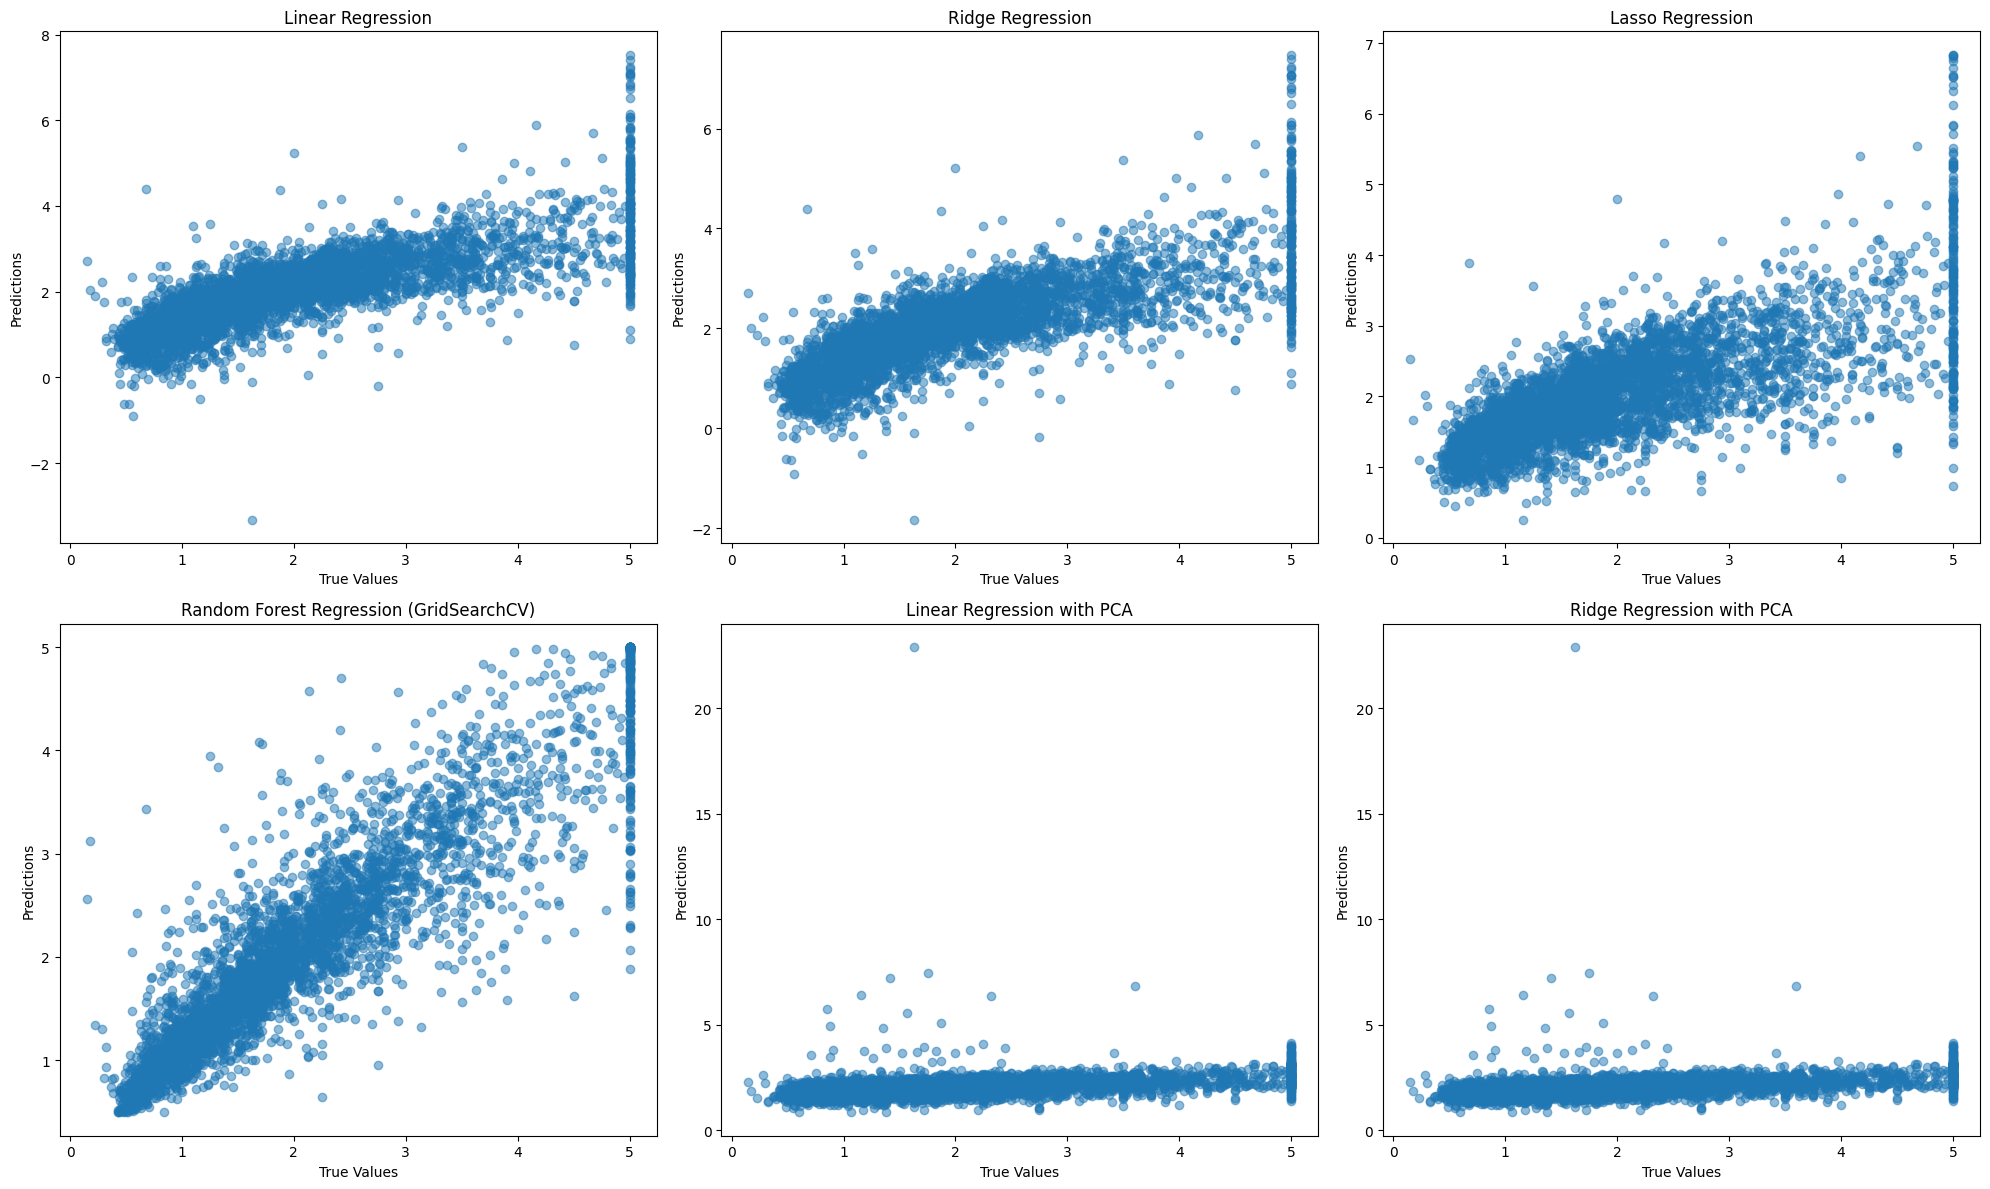

In [ ]:
# Visualization of Model Predictions
def plot_predictions(models, titles):
    plt.figure(figsize=(20, 12))
    for i, (model, title) in enumerate(zip(models, titles), 1):
        y_pred = model.predict(X_test if 'PCA' not in title else X_test_pca)
        plt.subplot(2, 3, i)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.title(title)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
    plt.tight_layout()
    plt.show()

plot_predictions([linear_model, ridge_model, lasso_model, best_rf_model, linear_model_pca, ridge_model_pca],
                 ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
                  'Random Forest Regression (GridSearchCV)', 'Linear Regression with PCA',
                  'Ridge Regression with PCA'])

In [ ]:
# Function to Evaluate Model Performance
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\nMean Squared Error: {mse}\nR2 Score: {r2}\n")

In [ ]:
# Evaluate Models
print("\nModel Evaluation:")
evaluate_model("Linear Regression", linear_model, X_test, y_test)
evaluate_model("Ridge Regression", ridge_model, X_test, y_test)
evaluate_model("Lasso Regression", lasso_model, X_test, y_test)
evaluate_model("Random Forest Regression (GridSearchCV)", best_rf_model, X_test, y_test)



Model Evaluation:
Linear Regression:
Mean Squared Error: 0.5266407258688113
R2 Score: 0.5981096477408322

Ridge Regression:
Mean Squared Error: 0.5239113565016954
R2 Score: 0.6001924855513452

Lasso Regression:
Mean Squared Error: 0.6135115198058131
R2 Score: 0.5318167610318159

Random Forest Regression (GridSearchCV):
Mean Squared Error: 0.25449002823157124
R2 Score: 0.8057934336094064



In [ ]:
# Evaluate PCA Models
print("\nModel Evaluation with PCA:")
evaluate_model("Linear Regression with PCA", linear_model_pca, X_test_pca, y_test)
evaluate_model("Ridge Regression with PCA", ridge_model_pca, X_test_pca, y_test)
evaluate_model("Lasso Regression with PCA", lasso_model_pca, X_test_pca, y_test)
evaluate_model("Random Forest Regression with PCA", rf_model_pca, X_test_pca, y_test)


Model Evaluation with PCA:
Linear Regression with PCA:
Mean Squared Error: 1.1460969957373808
R2 Score: 0.12538984792678398

Ridge Regression with PCA:
Mean Squared Error: 1.146095721255501
R2 Score: 0.12539082051007744

Lasso Regression with PCA:
Mean Squared Error: 1.2511885274783188
R2 Score: 0.04519234204429734

Random Forest Regression with PCA:
Mean Squared Error: 0.5940522566250978
R2 Score: 0.546666524352911

